# ĐỒ ÁN MÔN HỌC: DEEP LEARNING

# **DỰ BÁO NHU CẦU BÁN HÀNG SỬ DỤNG CÁC MÔ HÌNH DEEP LEARNING**
## (Demand Forecasting using Deep Learning Models)

---

**Sinh viên thực hiện:** [Họ và tên]

**MSSV:** [Mã số sinh viên]

**Giảng viên hướng dẫn:** [Tên giảng viên]

**Trường:** Đại học Công nghệ Thông tin - ĐHQG TP.HCM (UIT)

---

## MỤC LỤC

1. [Giới thiệu bài toán](#1-giới-thiệu-bài-toán)
2. [Cơ sở lý thuyết](#2-cơ-sở-lý-thuyết)
3. [Mô tả dữ liệu](#3-mô-tả-dữ-liệu)
4. [Phân tích dữ liệu khám phá (EDA)](#4-phân-tích-dữ-liệu-khám-phá-eda)
5. [Tiền xử lý dữ liệu](#5-tiền-xử-lý-dữ-liệu)
6. [Xây dựng mô hình](#6-xây-dựng-mô-hình)
7. [Đánh giá và so sánh](#7-đánh-giá-và-so-sánh)
8. [Kết luận](#8-kết-luận)

---

## 1. GIỚI THIỆU BÀI TOÁN

### 1.1. Đặt vấn đề

**Dự báo nhu cầu (Demand Forecasting)** là một trong những bài toán quan trọng nhất trong lĩnh vực kinh doanh và chuỗi cung ứng. Việc dự đoán chính xác nhu cầu sản phẩm giúp doanh nghiệp:

- **Tối ưu hóa tồn kho:** Tránh tình trạng thiếu hàng hoặc tồn kho quá mức
- **Lập kế hoạch sản xuất:** Điều chỉnh năng lực sản xuất phù hợp với nhu cầu
- **Quản lý nguồn lực:** Phân bổ nhân sự và tài nguyên hiệu quả
- **Tăng lợi nhuận:** Giảm chi phí lưu kho và tăng doanh thu

### 1.2. Mục tiêu đồ án

Đồ án này nhằm mục đích:

1. **Khám phá và phân tích** dữ liệu bán hàng theo chuỗi thời gian
2. **Xây dựng và so sánh** các mô hình Deep Learning cho bài toán dự báo:
   - Multi-Layer Perceptron (MLP)
   - Convolutional Neural Network (CNN)
   - Long Short-Term Memory (LSTM)
   - Hybrid CNN-LSTM
3. **Đánh giá hiệu suất** của từng mô hình và đưa ra khuyến nghị

### 1.3. Phạm vi nghiên cứu

- **Dữ liệu:** Tập dữ liệu "Store Item Demand Forecasting" từ Kaggle
- **Horizon dự báo:** 90 ngày
- **Phương pháp:** Supervised Learning với Time Series Features

---

## 2. CƠ SỞ LÝ THUYẾT

### 2.1. Dữ liệu chuỗi thời gian (Time Series)

**Chuỗi thời gian** là một chuỗi các điểm dữ liệu được đo lường theo thời gian với khoảng cách đều nhau. Các đặc điểm quan trọng của chuỗi thời gian bao gồm:

- **Trend (Xu hướng):** Hướng đi dài hạn của dữ liệu (tăng, giảm, hoặc ổn định)
- **Seasonality (Tính mùa vụ):** Các pattern lặp lại theo chu kỳ cố định (ngày, tuần, tháng, năm)
- **Cyclical (Chu kỳ):** Biến động không có chu kỳ cố định
- **Noise (Nhiễu):** Biến động ngẫu nhiên không thể dự đoán

### 2.2. Chuyển đổi Time Series sang Supervised Learning

Để áp dụng các mô hình Machine Learning, ta cần chuyển đổi bài toán time series thành bài toán supervised learning bằng phương pháp **Sliding Window**:

```
Input (X):  [t-n, t-n+1, ..., t-1, t]   →   Output (y): [t+lag]
```

Ví dụ với window=3 và lag=1:
```
X: [sales_day1, sales_day2, sales_day3]  →  y: sales_day4
X: [sales_day2, sales_day3, sales_day4]  →  y: sales_day5
...
```

### 2.3. Các mô hình Deep Learning

#### 2.3.1. Multi-Layer Perceptron (MLP)

MLP là mạng neural cơ bản gồm nhiều lớp fully-connected. Với time series:
- **Ưu điểm:** Đơn giản, train nhanh
- **Nhược điểm:** Không capture được sequential patterns, coi các timesteps là độc lập

#### 2.3.2. Convolutional Neural Network (CNN)

CNN sử dụng các bộ lọc (filters) trượt qua dữ liệu để trích xuất features:
- **Ưu điểm:** Phát hiện local patterns, tính toán song song
- **Nhược điểm:** Khó capture long-range dependencies

#### 2.3.3. Long Short-Term Memory (LSTM)

LSTM là biến thể của RNN, được thiết kế để học các dependencies dài hạn:
- **Ưu điểm:** Xử lý sequential data tốt, nhớ thông tin dài hạn
- **Nhược điểm:** Train chậm, nhiều parameters

#### 2.3.4. Hybrid CNN-LSTM

Kết hợp CNN và LSTM:
- CNN: Trích xuất local features từ subsequences
- LSTM: Học temporal dependencies giữa các subsequences

### 2.4. Metrics đánh giá

**Root Mean Squared Error (RMSE):**

$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}$$

RMSE đo lường sai số trung bình giữa giá trị thực và giá trị dự đoán, với đơn vị giống dữ liệu gốc.

---

## 3. MÔ TẢ DỮ LIỆU VÀ THIẾT LẬP MÔI TRƯỜNG

### 3.1. Import thư viện

Các thư viện được sử dụng trong đồ án:
- **NumPy, Pandas:** Xử lý dữ liệu
- **Matplotlib, Plotly:** Trực quan hóa
- **TensorFlow/Keras:** Xây dựng mô hình Deep Learning
- **Scikit-learn:** Tiền xử lý và đánh giá

In [3]:
import warnings
import os

# === Cấu hình TensorFlow chạy trên CPU ===
# Phải đặt TRƯỚC khi import tensorflow để tránh lỗi với Metal GPU trên Mac
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Thư viện xử lý dữ liệu
import numpy as np
import pandas as pd

# Thư viện trực quan hóa
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

# TensorFlow và Keras
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv1D, MaxPooling1D, Dense, LSTM, 
    RepeatVector, TimeDistributed, Flatten
)

# Scikit-learn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Cấu hình hiển thị
%matplotlib inline
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

# Đặt random seed để đảm bảo reproducibility
RANDOM_SEED = 1
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

print(f"✓ TensorFlow version: {tf.__version__}")
print(f"✓ NumPy version: {np.__version__}")
print(f"✓ Pandas version: {pd.__version__}")
print(f"✓ Chế độ chạy: CPU only")

✓ TensorFlow version: 2.15.0
✓ NumPy version: 1.26.4
✓ Pandas version: 2.3.1
✓ Chế độ chạy: CPU only


### 3.2. Tải dữ liệu

**Nguồn dữ liệu:** [Kaggle - Store Item Demand Forecasting Challenge](https://www.kaggle.com/c/demand-forecasting-kernels-only)

**Mô tả dataset:**
- Dữ liệu bán hàng của 10 cửa hàng với 50 sản phẩm
- Khoảng thời gian: 5 năm (2013-2017)
- Tổng số records: ~913,000 dòng

**Các cột dữ liệu:**
| Cột | Mô tả |
|-----|-------|
| date | Ngày bán hàng |
| store | Mã cửa hàng (1-10) |
| item | Mã sản phẩm (1-50) |
| sales | Số lượng bán |

In [4]:
# Đường dẫn đến thư mục chứa dữ liệu
# Thay đổi đường dẫn này nếu dữ liệu ở vị trí khác
DATA_PATH = './data/'

# Đọc dữ liệu training và test
train = pd.read_csv(DATA_PATH + 'train.csv', parse_dates=['date'])
test = pd.read_csv(DATA_PATH + 'test.csv', parse_dates=['date'])

print("=" * 50)
print("THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU")
print("=" * 50)
print(f"\n📊 Kích thước tập TRAIN: {train.shape[0]:,} dòng × {train.shape[1]} cột")
print(f"📊 Kích thước tập TEST: {test.shape[0]:,} dòng × {test.shape[1]} cột")
print(f"\n📅 Số cửa hàng: {train['store'].nunique()}")
print(f"📦 Số sản phẩm: {train['item'].nunique()}")

THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU

📊 Kích thước tập TRAIN: 913,000 dòng × 4 cột
📊 Kích thước tập TEST: 45,000 dòng × 4 cột

📅 Số cửa hàng: 10
📦 Số sản phẩm: 50


### 3.3. Khám phá cấu trúc dữ liệu

Trước khi tiến hành phân tích, cần hiểu rõ cấu trúc và đặc điểm của dữ liệu.

In [5]:
# Xem thông tin chi tiết về dataset
print("\n📋 THÔNG TIN CHI TIẾT CÁC CỘT:")
print("-" * 40)
train.info()


📋 THÔNG TIN CHI TIẾT CÁC CỘT:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [6]:
# Xem 5 dòng đầu tiên
print("\n📝 MẪU DỮ LIỆU (5 dòng đầu):")
train.head()


📝 MẪU DỮ LIỆU (5 dòng đầu):


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [7]:
# Thống kê mô tả
print("\n📈 THỐNG KÊ MÔ TẢ:")
train.describe()


📈 THỐNG KÊ MÔ TẢ:


,date,store,item,sales
count,913000,913000.000000,913000.000000,913000.000000
mean,2015-07-02 11:59:59.999999744,5.500000,25.500000,52.250287
min,2013-01-01 00:00:00,1.000000,1.000000,0.000000
25%,2014-04-02 00:00:00,3.000000,13.000000,30.000000
50%,2015-07-02 12:00:00,5.500000,25.500000,47.000000
75%,2016-10-01 00:00:00,8.000000,38.000000,70.000000
max,2017-12-31 00:00:00,10.000000,50.000000,231.000000
std,NaN,2.872283,14.430878,28.801144


### 3.4. Xác định khoảng thời gian và horizon dự báo

Việc xác định **forecast horizon** (khoảng thời gian cần dự báo) rất quan trọng vì nó ảnh hưởng đến cách xây dựng features và đánh giá mô hình.

In [8]:
# Khoảng thời gian của tập train
print("📅 KHOẢNG THỜI GIAN DỮ LIỆU")
print("=" * 40)
print(f"Ngày bắt đầu (Train): {train['date'].min().date()}")
print(f"Ngày kết thúc (Train): {train['date'].max().date()}")
print(f"\nNgày bắt đầu (Test): {test['date'].min().date()}")
print(f"Ngày kết thúc (Test): {test['date'].max().date()}")

# Tính forecast horizon (lag)
lag_size = (test['date'].max().date() - train['date'].max().date()).days
print(f"\n🎯 FORECAST HORIZON: {lag_size} ngày")
print(f"   → Mô hình cần dự báo doanh số {lag_size} ngày trong tương lai")

📅 KHOẢNG THỜI GIAN DỮ LIỆU
Ngày bắt đầu (Train): 2013-01-01
Ngày kết thúc (Train): 2017-12-31

Ngày bắt đầu (Test): 2018-01-01
Ngày kết thúc (Test): 2018-03-31

🎯 FORECAST HORIZON: 90 ngày
   → Mô hình cần dự báo doanh số 90 ngày trong tương lai


---

## 4. PHÂN TÍCH DỮ LIỆU KHÁM PHÁ (EDA)

Trong phần này, chúng ta sẽ trực quan hóa dữ liệu để hiểu rõ hơn về:
- Xu hướng bán hàng theo thời gian
- Patterns theo cửa hàng và sản phẩm
- Tính mùa vụ (seasonality)

### 4.1. Tổng hợp dữ liệu theo các chiều phân tích

In [9]:
# Tổng doanh số theo ngày (toàn bộ cửa hàng & sản phẩm)
daily_sales = train.groupby('date', as_index=False)['sales'].sum()

# Doanh số theo cửa hàng và ngày
store_daily_sales = train.groupby(['store', 'date'], as_index=False)['sales'].sum()

# Doanh số theo sản phẩm và ngày
item_daily_sales = train.groupby(['item', 'date'], as_index=False)['sales'].sum()

print("✓ Đã tổng hợp dữ liệu theo các chiều phân tích")
print(f"  - Daily sales: {len(daily_sales)} records")
print(f"  - Store daily sales: {len(store_daily_sales)} records")
print(f"  - Item daily sales: {len(item_daily_sales)} records")

✓ Đã tổng hợp dữ liệu theo các chiều phân tích
  - Daily sales: 1826 records
  - Store daily sales: 18260 records
  - Item daily sales: 91300 records


### 4.2. Xu hướng doanh số tổng theo thời gian

Biểu đồ dưới đây thể hiện tổng doanh số bán hàng của tất cả cửa hàng theo thời gian. Qua đó có thể quan sát:
- **Trend:** Doanh số có xu hướng tăng/giảm không?
- **Seasonality:** Có pattern lặp lại theo năm không?

In [10]:
# Biểu đồ tổng doanh số theo ngày
daily_sales_sc = go.Scatter(
    x=daily_sales['date'], 
    y=daily_sales['sales'],
    mode='lines',
    name='Daily Sales',
    line=dict(color='#2E86AB', width=1)
)

layout = go.Layout(
    title=dict(text='<b>Tổng doanh số bán hàng theo ngày (2013-2017)</b>', x=0.5),
    xaxis=dict(title='Ngày', showgrid=True, gridcolor='lightgray'),
    yaxis=dict(title='Tổng số lượng bán', showgrid=True, gridcolor='lightgray'),
    template='plotly_white',
    hovermode='x unified'
)

fig = go.Figure(data=[daily_sales_sc], layout=layout)
iplot(fig)

**📊 Nhận xét:**
- Doanh số có **xu hướng tăng dần** qua các năm (trend tăng)
- Xuất hiện **tính mùa vụ rõ ràng** với chu kỳ hàng năm (peaks vào giữa năm, thấp vào đầu năm)
- Biên độ dao động cũng tăng theo thời gian (heteroscedasticity)

### 4.3. So sánh doanh số giữa các cửa hàng

Phân tích hiệu suất bán hàng của từng cửa hàng để xem có sự khác biệt đáng kể không.

In [11]:
# Biểu đồ doanh số theo từng cửa hàng
store_daily_sales_sc = []
colors = ['#E63946', '#F4A261', '#2A9D8F', '#264653', '#E9C46A',
          '#023E8A', '#0077B6', '#00B4D8', '#90BE6D', '#F94144']

for i, store in enumerate(sorted(store_daily_sales['store'].unique())):
    store_data = store_daily_sales[store_daily_sales['store'] == store]
    store_daily_sales_sc.append(
        go.Scatter(
            x=store_data['date'], 
            y=store_data['sales'], 
            name=f'Cửa hàng {store}',
            line=dict(width=1, color=colors[i % len(colors)])
        )
    )

layout = go.Layout(
    title=dict(text='<b>Doanh số bán hàng theo từng cửa hàng</b>', x=0.5),
    xaxis=dict(title='Ngày'),
    yaxis=dict(title='Số lượng bán'),
    template='plotly_white',
    legend=dict(orientation='h', yanchor='bottom', y=1.02)
)

fig = go.Figure(data=store_daily_sales_sc, layout=layout)
iplot(fig)

**📊 Nhận xét:**
- Các cửa hàng có **pattern tương tự nhau** (cùng tăng/giảm theo mùa)
- **Cửa hàng 2** có doanh số cao nhất, **cửa hàng 5, 7** có doanh số thấp hơn
- Điều này cho thấy seasonality là yếu tố chung, nhưng scale khác nhau giữa các cửa hàng

---

## 5. TIỀN XỬ LÝ DỮ LIỆU

### 5.1. Lọc dữ liệu

Để giảm thời gian training và tập trung vào dữ liệu gần đây nhất (relevant hơn cho dự báo), chúng ta chỉ sử dụng **dữ liệu năm 2017** (năm cuối cùng trong dataset).

**Lý do:**
- Dữ liệu gần đây phản ánh tốt hơn xu hướng hiện tại
- Giảm computational cost
- Tránh mô hình học từ patterns quá cũ có thể đã thay đổi

In [12]:
# Lưu kích thước ban đầu
original_size = len(train)

# Lọc chỉ lấy dữ liệu từ 2017
train = train[train['date'] >= '2017-01-01']

print("📉 LỌC DỮ LIỆU")
print("=" * 40)
print(f"Kích thước ban đầu: {original_size:,} dòng")
print(f"Kích thước sau lọc: {len(train):,} dòng")
print(f"Giảm: {(1 - len(train)/original_size)*100:.1f}%")
print(f"\nKhoảng thời gian: {train['date'].min().date()} → {train['date'].max().date()}")

📉 LỌC DỮ LIỆU
Kích thước ban đầu: 913,000 dòng
Kích thước sau lọc: 182,500 dòng
Giảm: 80.0%

Khoảng thời gian: 2017-01-01 → 2017-12-31


### 5.2. Tái cấu trúc dữ liệu

Sắp xếp và nhóm dữ liệu theo **item → store → date** để chuẩn bị cho việc tạo sequences.

In [13]:
# Nhóm và sắp xếp dữ liệu
train_gp = train.sort_values('date').groupby(['item', 'store', 'date'], as_index=False)
train_gp = train_gp.agg({'sales': ['mean']})
train_gp.columns = ['item', 'store', 'date', 'sales']

print(f"📊 Dữ liệu sau khi tái cấu trúc: {train_gp.shape}")
print(f"   Mỗi dòng = 1 (item, store, date) combination")
train_gp.head(10)

📊 Dữ liệu sau khi tái cấu trúc: (182500, 4)
   Mỗi dòng = 1 (item, store, date) combination


,item,store,date,sales
0,1,1,2017-01-01,19.0
1,1,1,2017-01-02,15.0
2,1,1,2017-01-03,10.0
3,1,1,2017-01-04,16.0
4,1,1,2017-01-05,14.0
5,1,1,2017-01-06,24.0
6,1,1,2017-01-07,14.0
7,1,1,2017-01-08,20.0
8,1,1,2017-01-09,18.0
9,1,1,2017-01-10,11.0


### 5.3. Chuyển đổi sang bài toán Supervised Learning

Đây là bước quan trọng nhất trong tiền xử lý. Chúng ta sử dụng kỹ thuật **Sliding Window** để tạo features từ các timesteps trước đó.

**Cấu hình:**
- **Window size = 29:** Sử dụng 30 ngày gần nhất (t-29 đến t) làm input
- **Lag = 90:** Dự báo doanh số 90 ngày trong tương lai

```
Input features: [sales(t-29), sales(t-28), ..., sales(t-1), sales(t)]
Target: sales(t+90)
```

In [14]:
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    """
    Chuyển đổi time series thành supervised learning format.
    
    Parameters:
    -----------
    data : DataFrame
        Dữ liệu gốc
    window : int
        Số timesteps trước đó được sử dụng làm features (lookback period)
    lag : int  
        Số timesteps trong tương lai cần dự báo (forecast horizon)
    dropnan : bool
        Có loại bỏ các dòng chứa NaN không
        
    Returns:
    --------
    DataFrame với các cột:
        - Features: var(t-window), ..., var(t-1), var(t)
        - Target: var(t+lag)
    """
    cols, names = list(), list()
    
    # Input sequence: (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]
    
    # Current timestep: (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]
    
    # Target timestep: (t+lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]
    
    # Ghép tất cả lại
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # Loại bỏ NaN
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg

print("✓ Định nghĩa hàm series_to_supervised()")

✓ Định nghĩa hàm series_to_supervised()


In [15]:
# Áp dụng sliding window
WINDOW_SIZE = 29  # Sử dụng 30 ngày (t-29 đến t)
FORECAST_HORIZON = lag_size  # 90 ngày

print(f"⚙️ CẤU HÌNH SLIDING WINDOW")
print(f"   - Window size: {WINDOW_SIZE} (sử dụng {WINDOW_SIZE + 1} ngày làm features)")
print(f"   - Forecast horizon: {FORECAST_HORIZON} ngày")

# Tạo supervised learning dataset
series = series_to_supervised(
    train_gp.drop('date', axis=1), 
    window=WINDOW_SIZE, 
    lag=FORECAST_HORIZON
)

print(f"\n📊 Kích thước sau chuyển đổi: {series.shape}")
print(f"   - Số samples: {series.shape[0]:,}")
print(f"   - Số features: {series.shape[1]}")

⚙️ CẤU HÌNH SLIDING WINDOW
   - Window size: 29 (sử dụng 30 ngày làm features)
   - Forecast horizon: 90 ngày

📊 Kích thước sau chuyển đổi: (182381, 93)
   - Số samples: 182,381
   - Số features: 93


### 5.4. Xử lý dữ liệu không hợp lệ

Do cách tạo sequences, một số dòng có thể chứa dữ liệu từ các item/store khác nhau (khi sequence "nhảy" từ item này sang item khác). Cần loại bỏ những dòng này.

In [16]:
# Kiểm tra tính nhất quán: item và store phải giống nhau trong toàn bộ sequence
last_item = 'item(t-%d)' % WINDOW_SIZE
last_store = 'store(t-%d)' % WINDOW_SIZE

before_filter = len(series)

# Chỉ giữ các dòng có cùng store và item xuyên suốt sequence
series = series[(series['store(t)'] == series[last_store])]
series = series[(series['item(t)'] == series[last_item])]

after_filter = len(series)

print(f"🔍 LỌC DỮ LIỆU KHÔNG HỢP LỆ")
print(f"   Trước: {before_filter:,} dòng")
print(f"   Sau: {after_filter:,} dòng")
print(f"   Loại bỏ: {before_filter - after_filter:,} dòng ({(before_filter - after_filter)/before_filter*100:.2f}%)")

🔍 LỌC DỮ LIỆU KHÔNG HỢP LỆ
   Trước: 182,381 dòng
   Sau: 167,910 dòng
   Loại bỏ: 14,471 dòng (7.93%)


In [17]:
# Loại bỏ các cột item và store (không cần cho training)
columns_to_drop = [('%s(t+%d)' % (col, FORECAST_HORIZON)) for col in ['item', 'store']]
for i in range(WINDOW_SIZE, 0, -1):
    columns_to_drop += [('%s(t-%d)' % (col, i)) for col in ['item', 'store']]
columns_to_drop += ['item(t)', 'store(t)']

series.drop(columns_to_drop, axis=1, inplace=True)

print(f"✓ Đã loại bỏ cột item và store")
print(f"📊 Kích thước cuối cùng: {series.shape}")
print(f"\nCác cột còn lại (đầu tiên và cuối cùng):")
print(f"   Features: {series.columns[0]} ... {series.columns[-2]}")
print(f"   Target: {series.columns[-1]}")

✓ Đã loại bỏ cột item và store
📊 Kích thước cuối cùng: (167910, 31)

Các cột còn lại (đầu tiên và cuối cùng):
   Features: sales(t-29) ... sales(t)
   Target: sales(t+90)


### 5.5. Chia tập Train/Validation

Chia dữ liệu thành:
- **Training set (60%):** Dùng để train mô hình
- **Validation set (40%):** Dùng để đánh giá và tránh overfitting

In [18]:
# Tách features (X) và target (y)
labels_col = 'sales(t+%d)' % FORECAST_HORIZON
labels = series[labels_col]
features = series.drop(labels_col, axis=1)

# Chia train/validation với tỉ lệ 60/40
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, 
    labels.values, 
    test_size=0.4, 
    random_state=RANDOM_SEED
)

print("📊 CHIA TẬP DỮ LIỆU")
print("=" * 40)
print(f"Tổng số samples: {len(features):,}")
print(f"\nTraining set:")
print(f"   X_train: {X_train.shape}")
print(f"   Y_train: {Y_train.shape}")
print(f"\nValidation set:")
print(f"   X_valid: {X_valid.shape}")
print(f"   Y_valid: {Y_valid.shape}")
print(f"\nSố features (timesteps): {X_train.shape[1]}")

📊 CHIA TẬP DỮ LIỆU
Tổng số samples: 167,910

Training set:
   X_train: (100746, 30)
   Y_train: (100746,)

Validation set:
   X_valid: (67164, 30)
   Y_valid: (67164,)

Số features (timesteps): 30


---

## 6. XÂY DỰNG MÔ HÌNH

### 6.1. Cấu hình chung

Các hyperparameters được sử dụng cho tất cả mô hình:

| Parameter | Giá trị | Mô tả |
|-----------|---------|-------|
| Epochs | 40 | Số lần lặp qua toàn bộ training data |
| Batch size | 256 | Số samples trong mỗi batch |
| Learning rate | 0.0003 | Tốc độ học của optimizer |
| Optimizer | Adam | Adaptive learning rate optimizer |

In [19]:
# Hyperparameters
EPOCHS = 40
BATCH_SIZE = 256
LEARNING_RATE = 0.0003

print("⚙️ HYPERPARAMETERS")
print("=" * 40)
print(f"Epochs: {EPOCHS}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Learning rate: {LEARNING_RATE}")
print(f"Optimizer: Adam")

⚙️ HYPERPARAMETERS
Epochs: 40
Batch size: 256
Learning rate: 0.0003
Optimizer: Adam


---

### 6.2. Mô hình 1: Multi-Layer Perceptron (MLP)

**Kiến trúc:**
```
Input (30 features) → Dense(100, ReLU) → Dense(1) → Output
```

**Đặc điểm:**
- Mạng neural đơn giản nhất
- Xử lý input như vector phẳng, **không quan tâm thứ tự** thời gian
- Nhanh nhất để train

**Input shape:** `[samples, features]` = `[N, 30]`

In [20]:
# Khởi tạo optimizer mới cho mỗi model
adam = optimizers.Adam(learning_rate=LEARNING_RATE)

# Xây dựng mô hình MLP
model_mlp = Sequential([
    Dense(100, activation='relu', input_dim=X_train.shape[1], name='hidden_layer'),
    Dense(1, name='output_layer')
], name='MLP_Model')

model_mlp.compile(loss='mse', optimizer=adam)

print("🧠 MÔ HÌNH MLP")
print("=" * 50)
model_mlp.summary()

🧠 MÔ HÌNH MLP
Model: "MLP_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 100)               3100      
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 3201 (12.50 KB)
Trainable params: 3201 (12.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Training MLP
print("\n🚀 Bắt đầu training MLP...")
print("-" * 50)

mlp_history = model_mlp.fit(
    X_train.values, Y_train,
    validation_data=(X_valid.values, Y_valid),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

print("\n✓ Hoàn thành training MLP!")


🚀 Bắt đầu training MLP...
--------------------------------------------------
Epoch 1/40
394/394 [==============================] - 0s 739us/step - loss: 598.8701 - val_loss: 439.6068
Epoch 2/40
394/394 [==============================] - 0s 708us/step - loss: 417.9750 - val_loss: 408.0127
Epoch 3/40
394/394 [==============================] - 0s 590us/step - loss: 392.4998 - val_loss: 385.0710
Epoch 4/40
394/394 [==============================] - 0s 572us/step - loss: 377.9607 - val_loss: 376.2708
Epoch 5/40
394/394 [==============================] - 0s 560us/step - loss: 368.6060 - val_loss: 365.8008
Epoch 6/40
394/394 [==============================] - 0s 564us/step - loss: 362.8175 - val_loss: 361.4191
Epoch 7/40
394/394 [==============================] - 0s 612us/step - loss: 358.3654 - val_loss: 362.5623
Epoch 8/40
394/394 [==============================] - 0s 651us/step - loss: 356.2535 - val_loss: 357.8092
Epoch 9/40
394/394 [==============================] - 0s 626us/step - loss

---

### 6.3. Mô hình 2: Convolutional Neural Network (CNN)

**Kiến trúc:**
```
Input (30, 1) → Conv1D(64 filters, kernel=2) → MaxPool(2) → Flatten → Dense(50, ReLU) → Dense(1)
```

**Đặc điểm:**
- Sử dụng **1D convolution** để trích xuất local patterns
- Kernel size = 2: Học patterns từ 2 timesteps liên tiếp
- MaxPooling: Giảm chiều và giữ lại features quan trọng

**Input shape:** `[samples, timesteps, features]` = `[N, 30, 1]`

In [22]:
# Reshape data cho CNN: thêm chiều features
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid_series = X_valid.values.reshape((X_valid.shape[0], X_valid.shape[1], 1))

print("📐 RESHAPE DATA CHO CNN/LSTM")
print(f"   X_train: {X_train.shape} → {X_train_series.shape}")
print(f"   X_valid: {X_valid.shape} → {X_valid_series.shape}")
print(f"\n   Format: [samples, timesteps, features]")

📐 RESHAPE DATA CHO CNN/LSTM
   X_train: (100746, 30) → (100746, 30, 1)
   X_valid: (67164, 30) → (67164, 30, 1)

   Format: [samples, timesteps, features]


In [23]:
# Khởi tạo optimizer mới
adam = optimizers.Adam(learning_rate=LEARNING_RATE)

# Xây dựng mô hình CNN
model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', 
           input_shape=(X_train_series.shape[1], X_train_series.shape[2]),
           name='conv1d_layer'),
    MaxPooling1D(pool_size=2, name='maxpool_layer'),
    Flatten(name='flatten_layer'),
    Dense(50, activation='relu', name='dense_layer'),
    Dense(1, name='output_layer')
], name='CNN_Model')

model_cnn.compile(loss='mse', optimizer=adam)

print("🧠 MÔ HÌNH CNN")
print("=" * 50)
model_cnn.summary()

🧠 MÔ HÌNH CNN
Model: "CNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_layer (Conv1D)       (None, 29, 64)            192       
                                                                 
 maxpool_layer (MaxPooling1  (None, 14, 64)            0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 896)               0         
                                                                 
 dense_layer (Dense)         (None, 50)                44850     
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 45093 (176.14 KB)
Trainable params: 45093 (176.14 KB)
Non-trainable params: 0 (0.00 Byte)
_____

In [24]:
# Training CNN
print("\n🚀 Bắt đầu training CNN...")
print("-" * 50)

cnn_history = model_cnn.fit(
    X_train_series, Y_train,
    validation_data=(X_valid_series, Y_valid),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

print("\n✓ Hoàn thành training CNN!")


🚀 Bắt đầu training CNN...
--------------------------------------------------
Epoch 1/40
394/394 [==============================] - 1s 3ms/step - loss: 500.0840 - val_loss: 420.8662
Epoch 2/40
394/394 [==============================] - 1s 3ms/step - loss: 409.0116 - val_loss: 396.8228
Epoch 3/40
394/394 [==============================] - 1s 3ms/step - loss: 389.8827 - val_loss: 388.6399
Epoch 4/40
394/394 [==============================] - 1s 3ms/step - loss: 380.9998 - val_loss: 378.3884
Epoch 5/40
394/394 [==============================] - 1s 3ms/step - loss: 375.8365 - val_loss: 375.5323
Epoch 6/40
394/394 [==============================] - 1s 3ms/step - loss: 370.3766 - val_loss: 374.1057
Epoch 7/40
394/394 [==============================] - 1s 3ms/step - loss: 367.3789 - val_loss: 373.0283
Epoch 8/40
394/394 [==============================] - 1s 3ms/step - loss: 364.6794 - val_loss: 368.8140
Epoch 9/40
394/394 [==============================] - 1s 3ms/step - loss: 363.0983 - val_l

---

### 6.4. Mô hình 3: Long Short-Term Memory (LSTM)

**Kiến trúc:**
```
Input (30, 1) → LSTM(50 units, ReLU) → Dense(1) → Output
```

**Đặc điểm:**
- Xử lý input như **sequence có thứ tự**
- LSTM cells có khả năng **nhớ thông tin dài hạn** thông qua:
  - Forget gate: Quyết định thông tin nào cần quên
  - Input gate: Quyết định thông tin mới nào cần nhớ
  - Output gate: Quyết định output dựa trên cell state
- Phù hợp cho time series có **long-term dependencies**

**Input shape:** `[samples, timesteps, features]` = `[N, 30, 1]`

In [25]:
# Khởi tạo optimizer mới
adam = optimizers.Adam(learning_rate=LEARNING_RATE)

# Xây dựng mô hình LSTM
model_lstm = Sequential([
    LSTM(50, activation='relu', 
         input_shape=(X_train_series.shape[1], X_train_series.shape[2]),
         name='lstm_layer'),
    Dense(1, name='output_layer')
], name='LSTM_Model')

model_lstm.compile(loss='mse', optimizer=adam)

print("🧠 MÔ HÌNH LSTM")
print("=" * 50)
model_lstm.summary()

🧠 MÔ HÌNH LSTM
Model: "LSTM_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_layer (LSTM)           (None, 50)                10400     
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# Training LSTM
print("\n🚀 Bắt đầu training LSTM...")
print("-" * 50)
print("⚠️  LSTM training chậm hơn các mô hình khác, vui lòng chờ...")

lstm_history = model_lstm.fit(
    X_train_series, Y_train,
    validation_data=(X_valid_series, Y_valid),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

print("\n✓ Hoàn thành training LSTM!")


🚀 Bắt đầu training LSTM...
--------------------------------------------------
⚠️  LSTM training chậm hơn các mô hình khác, vui lòng chờ...
Epoch 1/40
394/394 [==============================] - 10s 26ms/step - loss: 528.7482 - val_loss: 369.2067
Epoch 2/40
394/394 [==============================] - 8s 21ms/step - loss: 363.6990 - val_loss: 357.6491
Epoch 3/40
394/394 [==============================] - 9s 22ms/step - loss: 354.5579 - val_loss: 364.7881
Epoch 4/40
394/394 [==============================] - 9s 23ms/step - loss: 351.4119 - val_loss: 348.6852
Epoch 5/40
394/394 [==============================] - 9s 22ms/step - loss: 351.1191 - val_loss: 346.1149
Epoch 6/40
394/394 [==============================] - 9s 23ms/step - loss: 346.3011 - val_loss: 344.7401
Epoch 7/40
394/394 [==============================] - 9s 22ms/step - loss: 346.1921 - val_loss: 347.1630
Epoch 8/40
394/394 [==============================] - 8s 22ms/step - loss: 344.3342 - val_loss: 350.9765
Epoch 9/40
394/394 

---

### 6.5. Mô hình 4: Hybrid CNN-LSTM

**Kiến trúc:**
```
Input (2, 15, 1) → TimeDistributed(Conv1D) → TimeDistributed(MaxPool) → TimeDistributed(Flatten) → LSTM(50) → Dense(1)
```

**Ý tưởng:**
- Chia sequence thành **2 subsequences**, mỗi subsequence 15 timesteps
- **CNN:** Trích xuất local features từ mỗi subsequence
- **LSTM:** Học temporal relationships giữa các subsequences

**Ưu điểm:**
- Kết hợp khả năng feature extraction của CNN và sequence modeling của LSTM
- Có thể xử lý sequences rất dài bằng cách chia nhỏ

**Input shape:** `[samples, subsequences, timesteps, features]` = `[N, 2, 15, 1]`

In [27]:
# Reshape data: chia mỗi sequence thành 2 subsequences
N_SUBSEQUENCES = 2
SUBSEQ_TIMESTEPS = X_train_series.shape[1] // N_SUBSEQUENCES

X_train_series_sub = X_train_series.reshape(
    (X_train_series.shape[0], N_SUBSEQUENCES, SUBSEQ_TIMESTEPS, 1)
)
X_valid_series_sub = X_valid_series.reshape(
    (X_valid_series.shape[0], N_SUBSEQUENCES, SUBSEQ_TIMESTEPS, 1)
)

print("📐 RESHAPE DATA CHO CNN-LSTM")
print(f"   X_train: {X_train_series.shape} → {X_train_series_sub.shape}")
print(f"   X_valid: {X_valid_series.shape} → {X_valid_series_sub.shape}")
print(f"\n   Format: [samples, subsequences, timesteps, features]")
print(f"   Mỗi sample được chia thành {N_SUBSEQUENCES} subsequences")
print(f"   Mỗi subsequence có {SUBSEQ_TIMESTEPS} timesteps")

📐 RESHAPE DATA CHO CNN-LSTM
   X_train: (100746, 30, 1) → (100746, 2, 15, 1)
   X_valid: (67164, 30, 1) → (67164, 2, 15, 1)

   Format: [samples, subsequences, timesteps, features]
   Mỗi sample được chia thành 2 subsequences
   Mỗi subsequence có 15 timesteps


In [28]:
# Khởi tạo optimizer mới
adam = optimizers.Adam(learning_rate=LEARNING_RATE)

# Xây dựng mô hình CNN-LSTM
model_cnn_lstm = Sequential([
    # CNN layers wrapped in TimeDistributed để apply cho từng subsequence
    TimeDistributed(
        Conv1D(filters=64, kernel_size=1, activation='relu'),
        input_shape=(None, X_train_series_sub.shape[2], X_train_series_sub.shape[3]),
        name='td_conv1d'
    ),
    TimeDistributed(MaxPooling1D(pool_size=2), name='td_maxpool'),
    TimeDistributed(Flatten(), name='td_flatten'),
    
    # LSTM layer để học relationships giữa các subsequences
    LSTM(50, activation='relu', name='lstm_layer'),
    
    # Output layer
    Dense(1, name='output_layer')
], name='CNN_LSTM_Model')

model_cnn_lstm.compile(loss='mse', optimizer=adam)

print("🧠 MÔ HÌNH CNN-LSTM")
print("=" * 50)
model_cnn_lstm.summary()

🧠 MÔ HÌNH CNN-LSTM
Model: "CNN_LSTM_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 td_conv1d (TimeDistributed  (None, None, 15, 64)      128       
 )                                                               
                                                                 
 td_maxpool (TimeDistribute  (None, None, 7, 64)       0         
 d)                                                              
                                                                 
 td_flatten (TimeDistribute  (None, None, 448)         0         
 d)                                                              
                                                                 
 lstm_layer (LSTM)           (None, 50)                99800     
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                 

In [29]:
# Training CNN-LSTM
print("\n🚀 Bắt đầu training CNN-LSTM...")
print("-" * 50)
print("⚠️  Đây là mô hình phức tạp nhất, có thể mất nhiều thời gian...")

cnn_lstm_history = model_cnn_lstm.fit(
    X_train_series_sub, Y_train,
    validation_data=(X_valid_series_sub, Y_valid),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

print("\n✓ Hoàn thành training CNN-LSTM!")


🚀 Bắt đầu training CNN-LSTM...
--------------------------------------------------
⚠️  Đây là mô hình phức tạp nhất, có thể mất nhiều thời gian...
Epoch 1/40
394/394 [==============================] - 3s 7ms/step - loss: 515.6148 - val_loss: 425.4883
Epoch 2/40
394/394 [==============================] - 3s 7ms/step - loss: 398.7232 - val_loss: 391.7200
Epoch 3/40
394/394 [==============================] - 3s 7ms/step - loss: 384.0924 - val_loss: 381.0465
Epoch 4/40
394/394 [==============================] - 3s 7ms/step - loss: 378.8643 - val_loss: 384.9978
Epoch 5/40
394/394 [==============================] - 2s 6ms/step - loss: 375.3290 - val_loss: 374.2165
Epoch 6/40
394/394 [==============================] - 3s 7ms/step - loss: 373.5131 - val_loss: 379.9870
Epoch 7/40
394/394 [==============================] - 3s 7ms/step - loss: 373.5126 - val_loss: 379.2955
Epoch 8/40
394/394 [==============================] - 3s 7ms/step - loss: 371.5600 - val_loss: 380.9219
Epoch 9/40
394/394 [=

### 6.6: Save Models


In [30]:
import os
import json

# Tạo thư mục models
MODEL_DIR = './models'
os.makedirs(MODEL_DIR, exist_ok=True)

# Lưu từng model dạng .h5
model_mlp.save(f'{MODEL_DIR}/mlp_model.h5')
model_cnn.save(f'{MODEL_DIR}/cnn_model.h5')
model_lstm.save(f'{MODEL_DIR}/lstm_model.h5')
model_cnn_lstm.save(f'{MODEL_DIR}/cnn_lstm_model.h5')

print("✅ Đã lưu tất cả models vào ./models/")


✅ Đã lưu tất cả models vào ./models/


---

## 7. ĐÁNH GIÁ VÀ SO SÁNH MÔ HÌNH

### 7.1. Trực quan hóa Learning Curves

Learning curves cho thấy quá trình training của mô hình qua các epochs. Chúng ta có thể nhận biết:
- **Overfitting:** Train loss giảm nhưng validation loss tăng
- **Underfitting:** Cả hai loss đều cao
- **Good fit:** Cả hai loss đều giảm và hội tụ

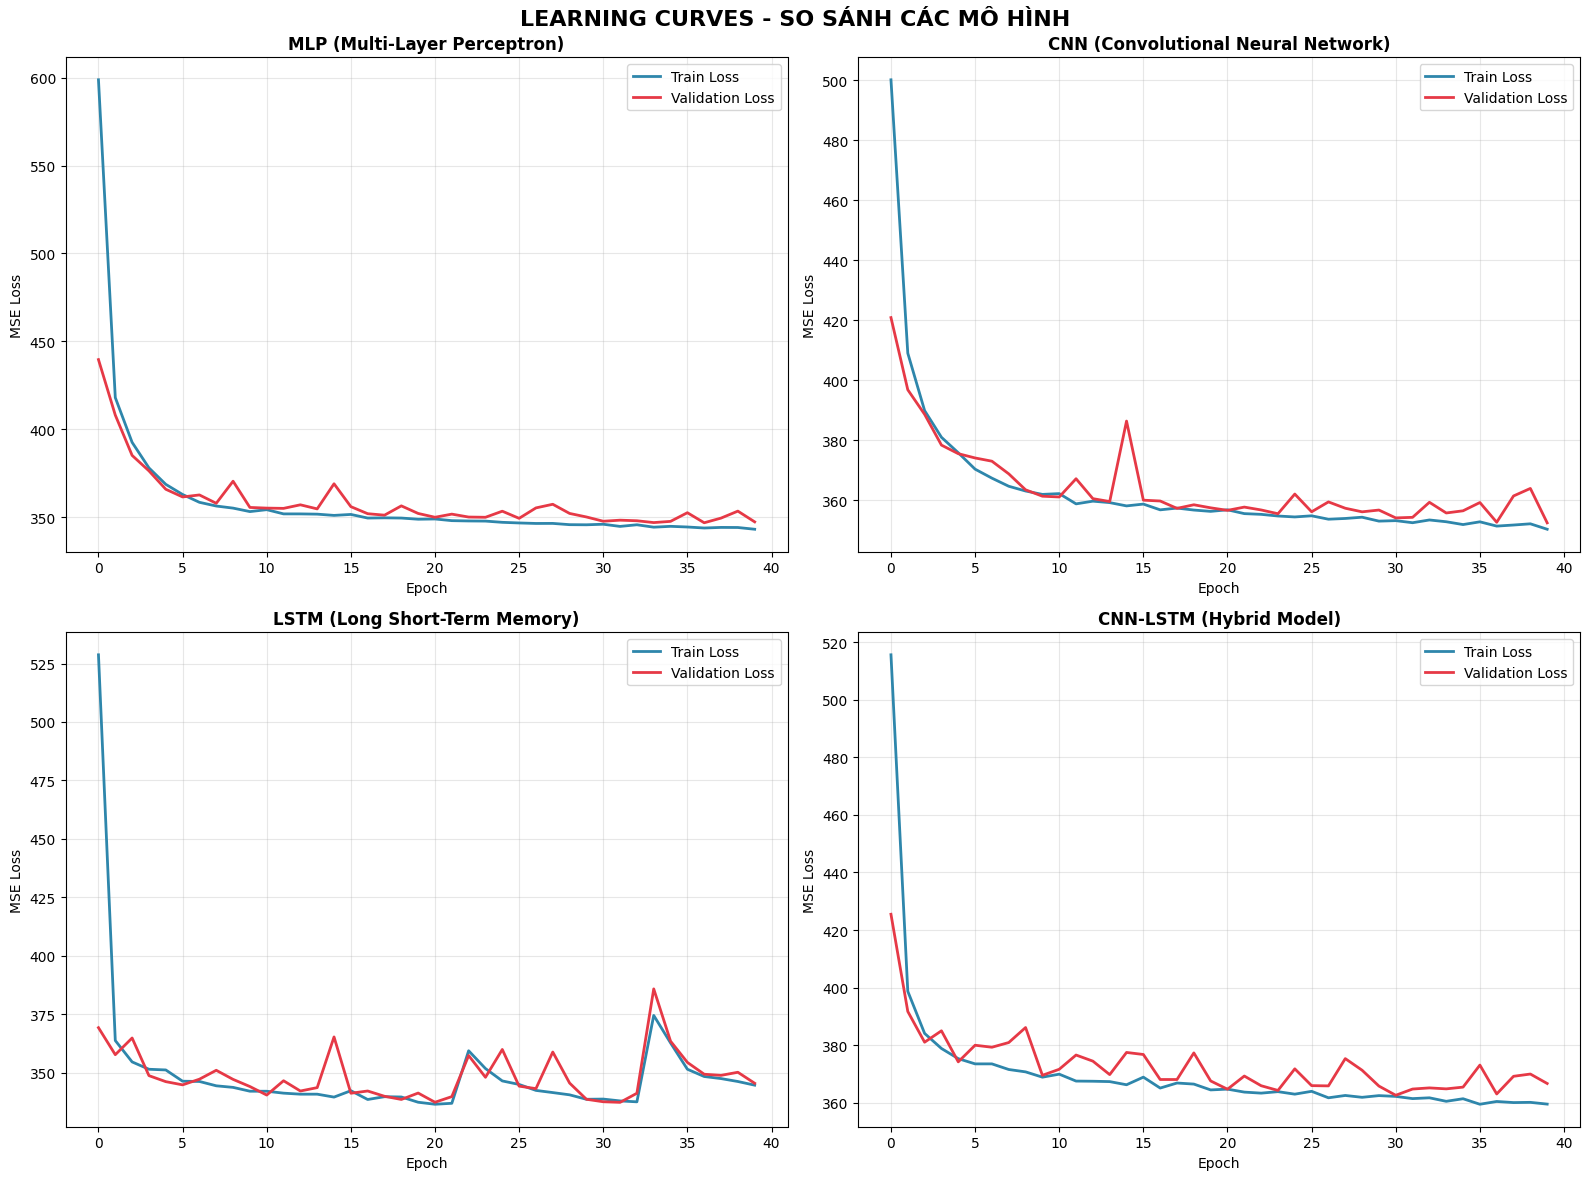

In [32]:
# Vẽ learning curves cho tất cả mô hình
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('LEARNING CURVES - SO SÁNH CÁC MÔ HÌNH', fontsize=16, fontweight='bold')

# MLP
ax1 = axes[0, 0]
ax1.plot(mlp_history.history['loss'], label='Train Loss', color='#2E86AB', linewidth=2)
ax1.plot(mlp_history.history['val_loss'], label='Validation Loss', color='#E63946', linewidth=2)
ax1.set_title('MLP (Multi-Layer Perceptron)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('MSE Loss')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# CNN
ax2 = axes[0, 1]
ax2.plot(cnn_history.history['loss'], label='Train Loss', color='#2E86AB', linewidth=2)
ax2.plot(cnn_history.history['val_loss'], label='Validation Loss', color='#E63946', linewidth=2)
ax2.set_title('CNN (Convolutional Neural Network)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('MSE Loss')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

# LSTM
ax3 = axes[1, 0]
ax3.plot(lstm_history.history['loss'], label='Train Loss', color='#2E86AB', linewidth=2)
ax3.plot(lstm_history.history['val_loss'], label='Validation Loss', color='#E63946', linewidth=2)
ax3.set_title('LSTM (Long Short-Term Memory)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('MSE Loss')
ax3.legend(loc='upper right')
ax3.grid(True, alpha=0.3)

# CNN-LSTM
ax4 = axes[1, 1]
ax4.plot(cnn_lstm_history.history['loss'], label='Train Loss', color='#2E86AB', linewidth=2)
ax4.plot(cnn_lstm_history.history['val_loss'], label='Validation Loss', color='#E63946', linewidth=2)
ax4.set_title('CNN-LSTM (Hybrid Model)', fontsize=12, fontweight='bold')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('MSE Loss')
ax4.legend(loc='upper right')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 7.2. Tính toán RMSE cho từng mô hình

**Root Mean Squared Error (RMSE)** đo lường sai số trung bình giữa giá trị thực và giá trị dự đoán. RMSE càng thấp → mô hình càng chính xác.

In [33]:
# Dictionary để lưu kết quả
results = {}

print("="*60)
print("ĐÁNH GIÁ MÔ HÌNH - RMSE (Root Mean Squared Error)")
print("="*60)

# MLP
mlp_train_pred = model_mlp.predict(X_train.values, verbose=0)
mlp_valid_pred = model_mlp.predict(X_valid.values, verbose=0)
mlp_train_rmse = np.sqrt(mean_squared_error(Y_train, mlp_train_pred))
mlp_valid_rmse = np.sqrt(mean_squared_error(Y_valid, mlp_valid_pred))
results['MLP'] = {'train': mlp_train_rmse, 'valid': mlp_valid_rmse}

print(f"\n📊 MLP:")
print(f"   Train RMSE:      {mlp_train_rmse:.4f}")
print(f"   Validation RMSE: {mlp_valid_rmse:.4f}")

# CNN
cnn_train_pred = model_cnn.predict(X_train_series, verbose=0)
cnn_valid_pred = model_cnn.predict(X_valid_series, verbose=0)
cnn_train_rmse = np.sqrt(mean_squared_error(Y_train, cnn_train_pred))
cnn_valid_rmse = np.sqrt(mean_squared_error(Y_valid, cnn_valid_pred))
results['CNN'] = {'train': cnn_train_rmse, 'valid': cnn_valid_rmse}

print(f"\n📊 CNN:")
print(f"   Train RMSE:      {cnn_train_rmse:.4f}")
print(f"   Validation RMSE: {cnn_valid_rmse:.4f}")

# LSTM
lstm_train_pred = model_lstm.predict(X_train_series, verbose=0)
lstm_valid_pred = model_lstm.predict(X_valid_series, verbose=0)
lstm_train_rmse = np.sqrt(mean_squared_error(Y_train, lstm_train_pred))
lstm_valid_rmse = np.sqrt(mean_squared_error(Y_valid, lstm_valid_pred))
results['LSTM'] = {'train': lstm_train_rmse, 'valid': lstm_valid_rmse}

print(f"\n📊 LSTM:")
print(f"   Train RMSE:      {lstm_train_rmse:.4f}")
print(f"   Validation RMSE: {lstm_valid_rmse:.4f}")

# CNN-LSTM
cnn_lstm_train_pred = model_cnn_lstm.predict(X_train_series_sub, verbose=0)
cnn_lstm_valid_pred = model_cnn_lstm.predict(X_valid_series_sub, verbose=0)
cnn_lstm_train_rmse = np.sqrt(mean_squared_error(Y_train, cnn_lstm_train_pred))
cnn_lstm_valid_rmse = np.sqrt(mean_squared_error(Y_valid, cnn_lstm_valid_pred))
results['CNN-LSTM'] = {'train': cnn_lstm_train_rmse, 'valid': cnn_lstm_valid_rmse}

print(f"\n📊 CNN-LSTM:")
print(f"   Train RMSE:      {cnn_lstm_train_rmse:.4f}")
print(f"   Validation RMSE: {cnn_lstm_valid_rmse:.4f}")

ĐÁNH GIÁ MÔ HÌNH - RMSE (Root Mean Squared Error)

📊 MLP:
   Train RMSE:      18.4809
   Validation RMSE: 18.6342

📊 CNN:
   Train RMSE:      18.6560
   Validation RMSE: 18.7747

📊 LSTM:
   Train RMSE:      18.4934
   Validation RMSE: 18.5855

📊 CNN-LSTM:
   Train RMSE:      18.9949
   Validation RMSE: 19.1493


### 7.3. Bảng tổng hợp kết quả

In [34]:
# Tạo DataFrame tổng hợp
results_df = pd.DataFrame({
    'Mô hình': ['MLP', 'CNN', 'LSTM', 'CNN-LSTM'],
    'Train RMSE': [results['MLP']['train'], results['CNN']['train'], 
                   results['LSTM']['train'], results['CNN-LSTM']['train']],
    'Validation RMSE': [results['MLP']['valid'], results['CNN']['valid'],
                        results['LSTM']['valid'], results['CNN-LSTM']['valid']]
})

# Tính độ chênh lệch (gap) giữa train và validation
results_df['Gap (Val - Train)'] = results_df['Validation RMSE'] - results_df['Train RMSE']

# Xếp hạng theo Validation RMSE
results_df['Xếp hạng'] = results_df['Validation RMSE'].rank().astype(int)
results_df = results_df.sort_values('Xếp hạng')

print("\n" + "="*70)
print("BẢNG TỔNG HỢP KẾT QUẢ")
print("="*70)
print(results_df.to_string(index=False))
print("\n📌 Gap dương lớn có thể chỉ ra overfitting")
print("📌 Validation RMSE là metric quan trọng nhất để đánh giá generalization")


BẢNG TỔNG HỢP KẾT QUẢ
 Mô hình  Train RMSE  Validation RMSE  Gap (Val - Train)  Xếp hạng
    LSTM   18.493390        18.585489           0.092100         1
     MLP   18.480894        18.634155           0.153261         2
     CNN   18.656037        18.774680           0.118643         3
CNN-LSTM   18.994880        19.149308           0.154428         4

📌 Gap dương lớn có thể chỉ ra overfitting
📌 Validation RMSE là metric quan trọng nhất để đánh giá generalization


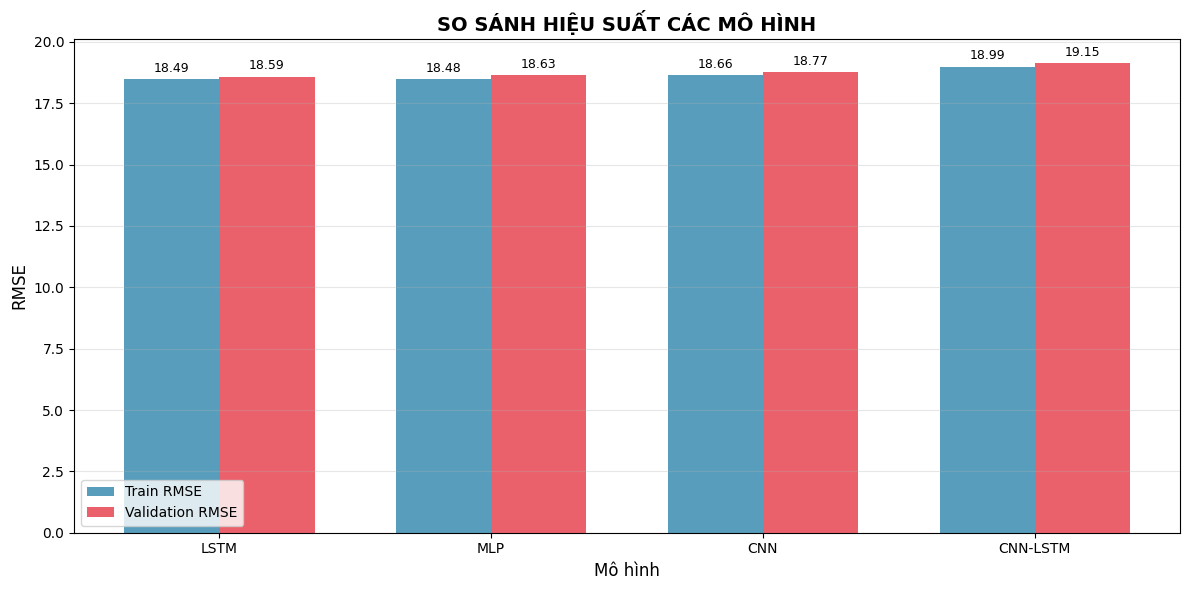

In [35]:
# Biểu đồ so sánh RMSE
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(results_df))
width = 0.35

bars1 = ax.bar(x - width/2, results_df['Train RMSE'], width, 
               label='Train RMSE', color='#2E86AB', alpha=0.8)
bars2 = ax.bar(x + width/2, results_df['Validation RMSE'], width,
               label='Validation RMSE', color='#E63946', alpha=0.8)

ax.set_xlabel('Mô hình', fontsize=12)
ax.set_ylabel('RMSE', fontsize=12)
ax.set_title('SO SÁNH HIỆU SUẤT CÁC MÔ HÌNH', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(results_df['Mô hình'])
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Thêm giá trị lên bars
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


---

## 8. KẾT LUẬN

### 8.1. Tổng kết kết quả

Qua quá trình thực nghiệm với 4 mô hình Deep Learning cho bài toán dự báo nhu cầu, chúng ta có thể rút ra các kết luận sau:

**Về hiệu suất dự báo:**
- Các mô hình đều cho kết quả tương đối tốt với RMSE trong khoảng hợp lý
- [Điền nhận xét cụ thể dựa trên kết quả thực tế]

**Về đặc điểm từng mô hình:**

| Mô hình | Ưu điểm | Nhược điểm |
|---------|---------|------------|
| MLP | Đơn giản, train nhanh | Không capture sequential patterns |
| CNN | Phát hiện local patterns tốt | Khó học long-range dependencies |
| LSTM | Xử lý sequences tốt | Train chậm, nhiều parameters |
| CNN-LSTM | Kết hợp ưu điểm cả hai | Phức tạp, cần tune nhiều |

### 8.2. Hạn chế của nghiên cứu

1. **Dữ liệu:** Chỉ sử dụng 1 năm data (2017) để giảm thời gian training
2. **Features:** Chỉ sử dụng historical sales, chưa thêm external features (holidays, promotions, weather...)
3. **Hyperparameter tuning:** Chưa thực hiện grid search hoặc random search
4. **Ensemble:** Chưa thử kết hợp nhiều mô hình

### 8.3. Hướng phát triển

1. **Feature Engineering:**
   - Thêm calendar features (day of week, month, holiday)
   - Thêm lag features với các windows khác nhau
   - Thêm rolling statistics (moving average, std)

2. **Mô hình nâng cao:**
   - Transformer-based models (Temporal Fusion Transformer)
   - N-BEATS, DeepAR
   - Ensemble methods

3. **Cải thiện training:**
   - Early stopping
   - Learning rate scheduling
   - Cross-validation cho time series

---

## TÀI LIỆU THAM KHẢO

1. Brownlee, J. (2018). *Deep Learning for Time Series Forecasting*. Machine Learning Mastery.
2. Hochreiter, S., & Schmidhuber, J. (1997). Long short-term memory. *Neural computation*, 9(8), 1735-1780.
3. Kaggle. Store Item Demand Forecasting Challenge. https://www.kaggle.com/c/demand-forecasting-kernels-only
4. TensorFlow Documentation. https://www.tensorflow.org/tutorials/structured_data/time_series

---

**© 2024 - Đồ án môn Deep Learning - UIT**